**In order to run this notebook, please ensure that the .csv files are read from the correct file Location. There are two cells where the file path for the .csv files might need to be changed if necessary. I do not know if you will be granted access to my google drive, as such, if you're going to load the data from your local computer/google drive then please change the file path.** 


**Model for Hepatitis classification**


In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#change file location to correct file path on grader's computer
df_data = pd.read_csv('/content/gdrive/My Drive/ECSE 551: Mini Project 1/hepatitis.csv')

In [ ]:
df_data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,ClassLabel
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1,1
3,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1,1


In [ ]:
df_data.shape

(142, 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b70b99898>]],
      dtype=object)

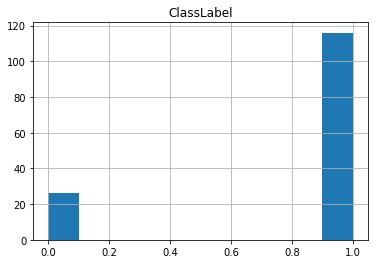

In [ ]:
df_data.hist('ClassLabel')

In [ ]:
#check for missing data entries to ensure there are no erros
if (df_data.isna().any().any()==False):
  print("There are no missing data entries")
else:
  print("Stop: Missing Data")

There are no missing data entries


# **Section 1: Data Exploration and Visualization**

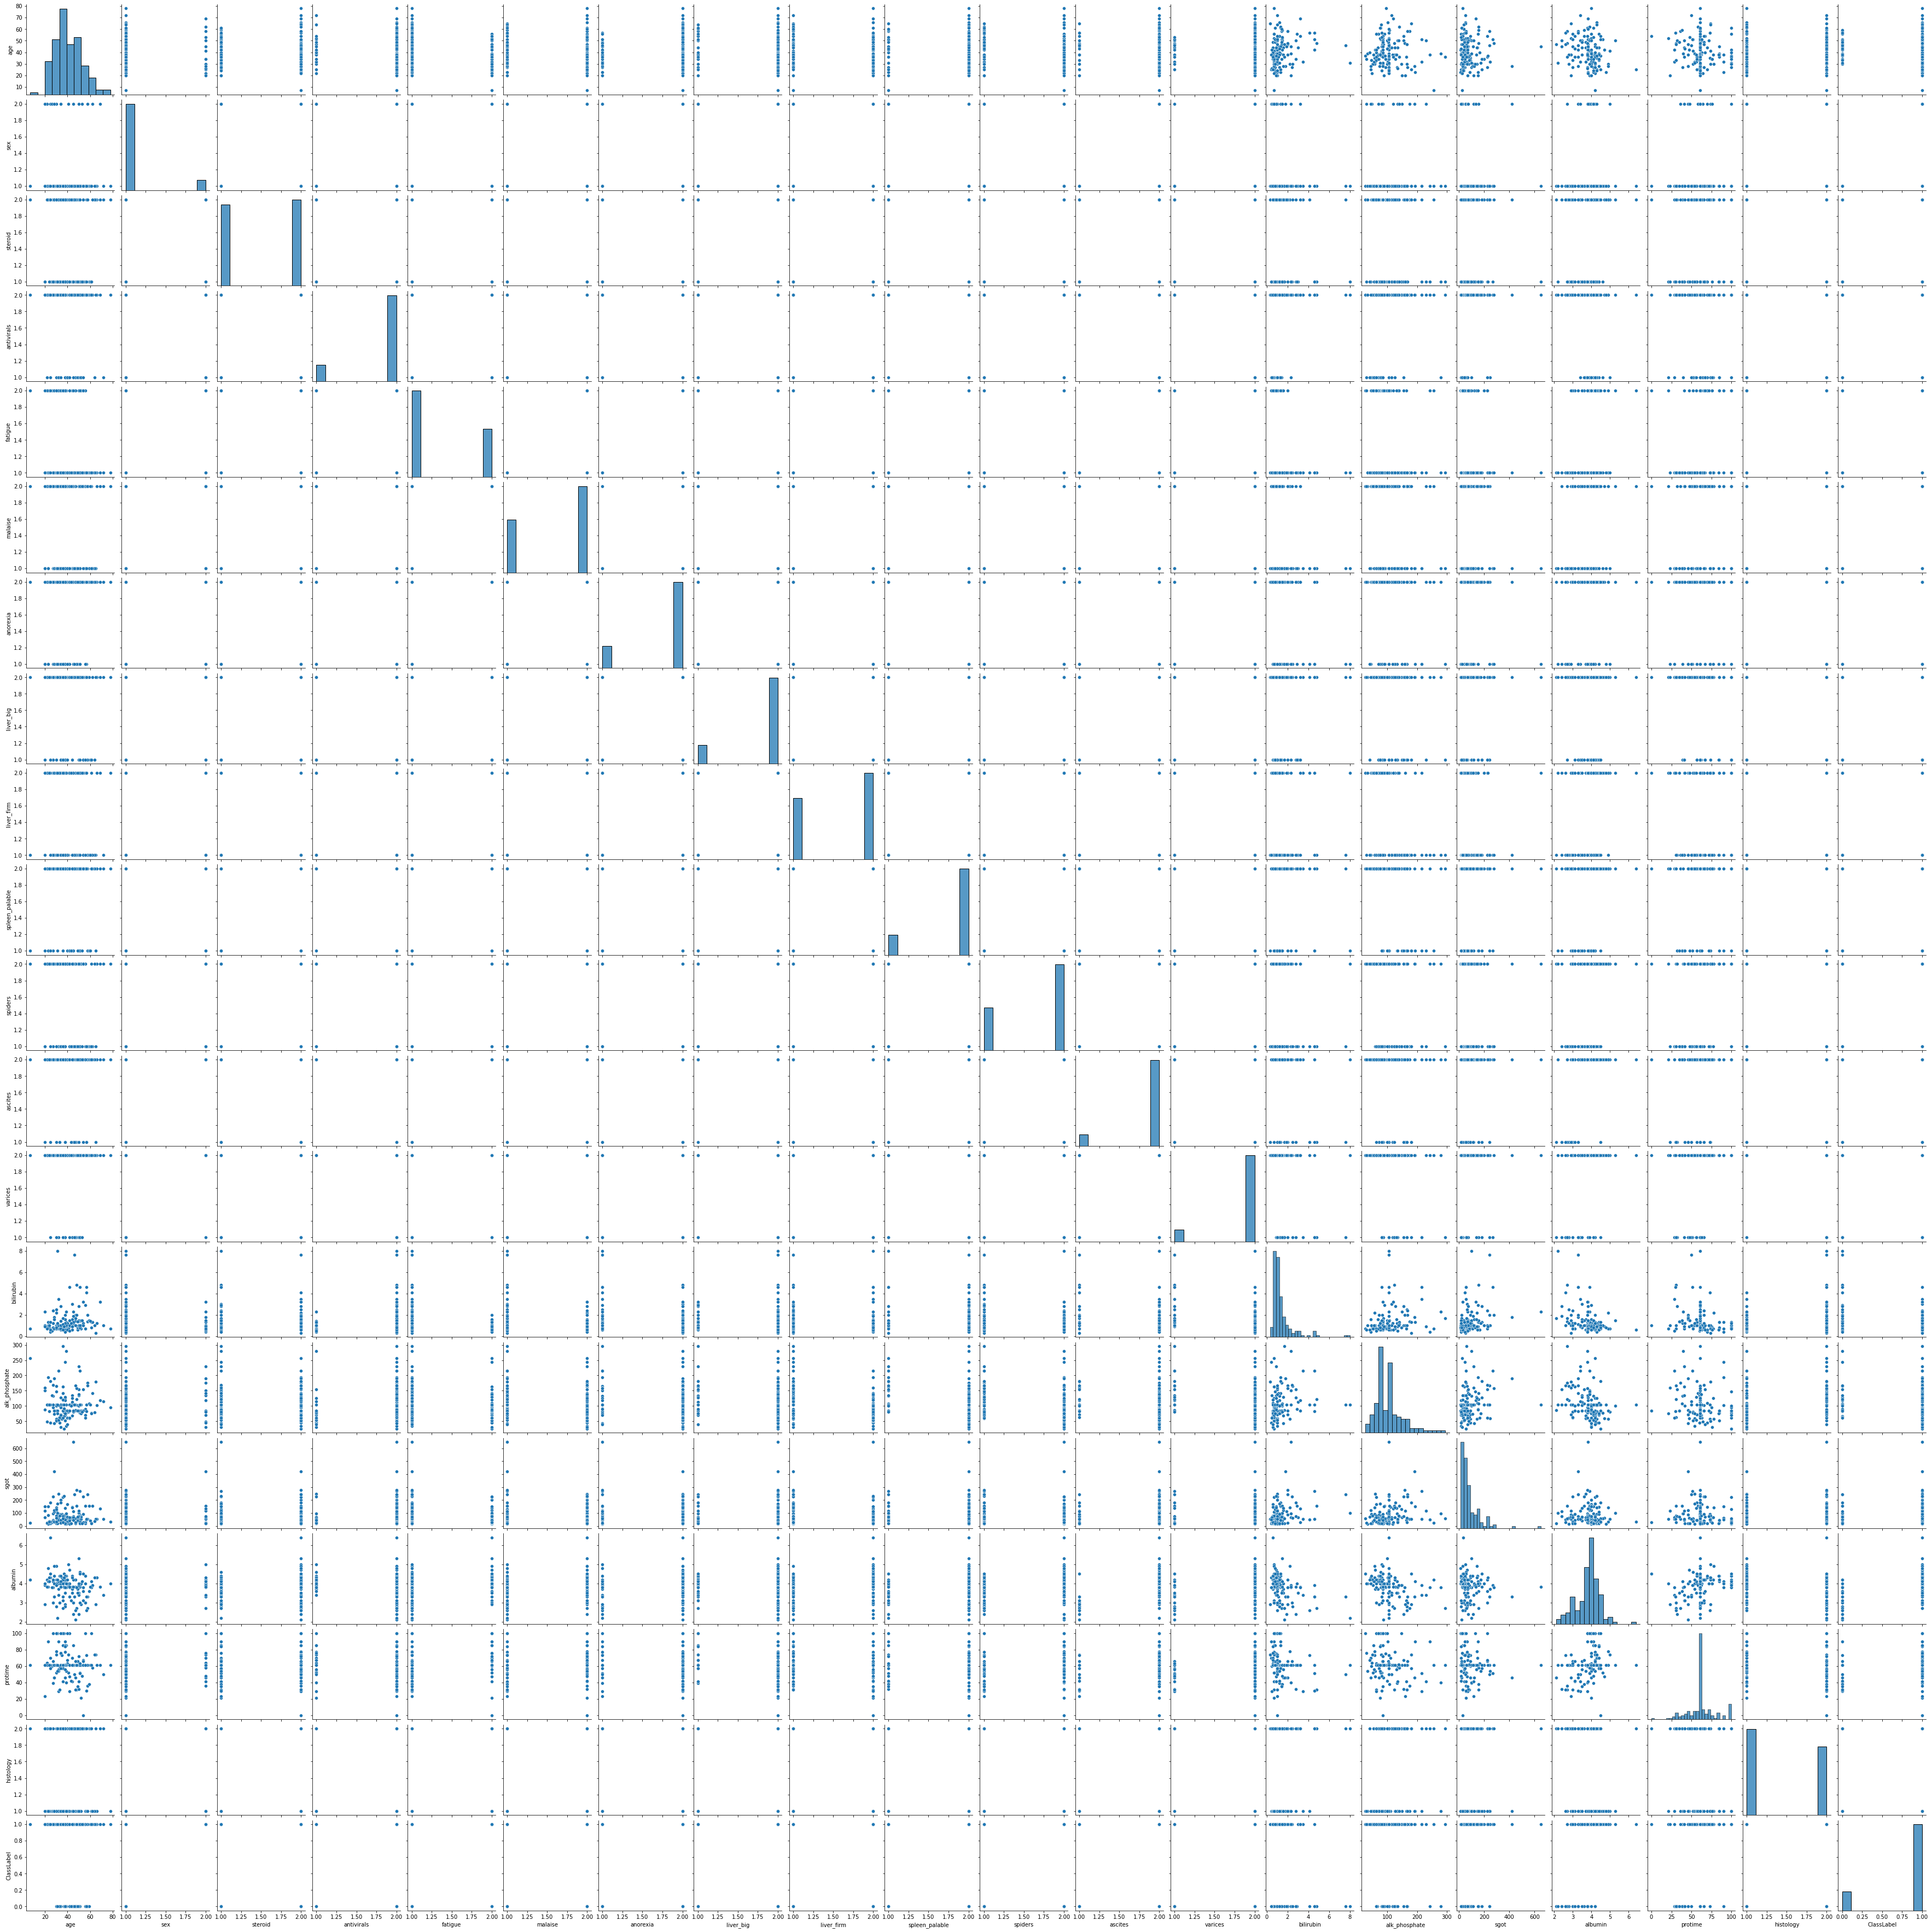

In [ ]:
features = list(df_data)

#obtain high level view of features and scatter plots to explore relationships 
#between features.
sns.pairplot(df_data)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b646abb00>]],
      dtype=object)

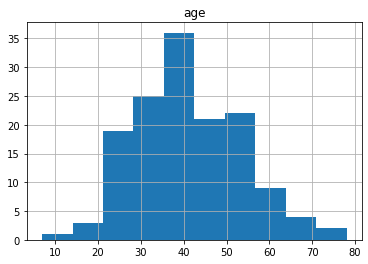

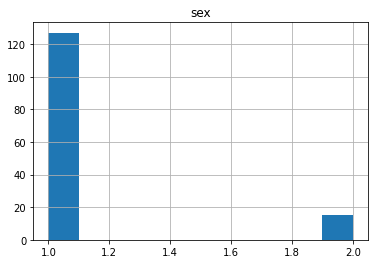

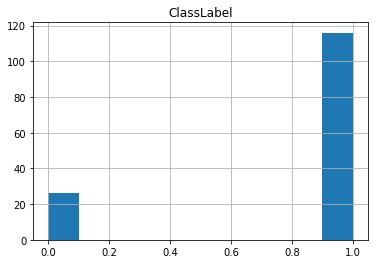

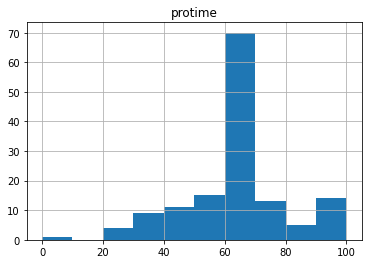

In [ ]:
#interesting relationships
df_data.hist('age')
df_data.hist('sex')
df_data.hist('ClassLabel')
df_data.hist('protime')

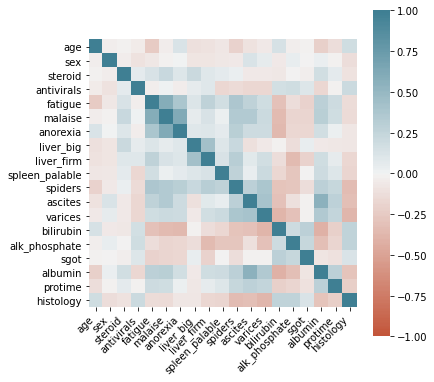

In [ ]:
corr = df_data.iloc[:,0:-1].corr()
plt.subplots(figsize=(6,6))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From the Corellation Map above, the strongly corelated features are extracted and analyzed further

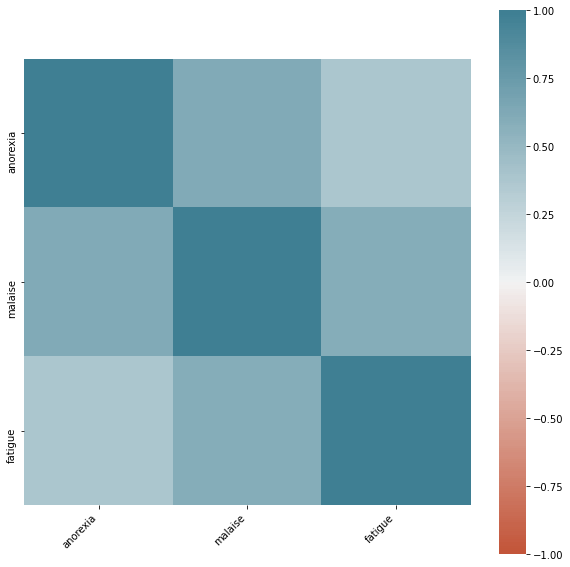

In [ ]:
corr = df_data[['anorexia','malaise','fatigue']].corr()
plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Another Useful Visualization Tool is the mosaic graph for two discrete variables

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


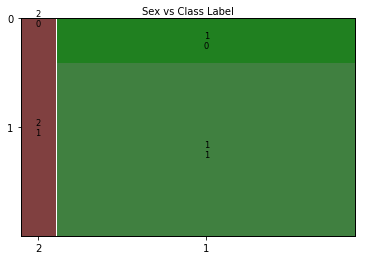

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df_data[['sex','ClassLabel']],['sex','ClassLabel'])
plt.xlabel('Sex vs Class Label')
plt.show()

# **Section 2: Data Preprocessing**

In [ ]:
#split into input and output, then convert to numpy arrays

#split data into numpy arrays
def split_data():
  X = df_data.iloc[:, 0:-1].to_numpy()
  y = df_data.iloc[:,-1:].to_numpy() 
  print("The shape of the feature matrix is: ",X.shape)
  print("The shape of the label vector is: ",y.shape)
  return X,y

X,y = split_data()  #features,#labels
X_normalized = preprocessing.scale(X) #z-normalize input
  
  


The shape of the feature matrix is:  (142, 19)
The shape of the label vector is:  (142, 1)


# **Section 3: Logistic Regression Class**

In [ ]:
import math
class logistic_regressor:
  
  def __init__(self, X, y, step_size=0.00005, no_of_steps = 30000, bias=True):
    self.X = X
    self.y = y
    self.step_size = step_size
    self.no_of_steps = no_of_steps
    self.bias = bias
  
  def sigmoid(self, z):
    return 1/(1+np.exp(-z))

  #cost function for loss/error plot
  def cost_function(self,h):
    return (-self.y*np.log(h)-(1-self.y)*np.log(1-h)).mean()

 #compute weights
  def fit(self):
    self.start_time = time.time()
    self.error = []
    if(self.bias):
      self.X = np.concatenate((np.ones((self.X.shape[0],1)), self.X), axis = 1)
    self.weights = np.zeros((self.X.shape[1],1))
    for i in range(self.no_of_steps):
      self.g = np.dot(self.X, self.weights)
      self.h = self.sigmoid(self.g)
      self.error.append(self.cost_function(self.h))
      self.grad = np.dot(self.X.T,(self.h-self.y))#/len(self.y)
      self.weights -= self.step_size*self.grad#/self.y.size
    self.end_time = time.time()
    print("The Time taken to fit the model is",self.end_time-self.start_time,"seconds")
    #return self.weights

  #gradient descent error plot
  def plot_error(self):
      self.err = np.array(self.error)
      import matplotlib.pyplot as plt
      plt.figure(figsize=(8,5))
      plt.plot(self.err)
      plt.ylabel('Cross Entropy Loss Function')
      plt.show()

  #based on weights, predict labels for new values of X  
  def predict(self, X):
    self.labels = []
    X = np.concatenate((np.ones((X.shape[0],1)), X), axis = 1)
    self.pred = np.dot(X,self.weights)
    self.pred = self.sigmoid(self.pred)
    for i in range (self.pred.shape[0]):
      if (self.pred[i]>=0.5):
        self.labels.append(1)
      else:
        self.labels.append(0)
    return np.array(self.labels).reshape([X.shape[0],1])

  #take in new values of X with labels y. 
  # predict y using fit predict on X then calculate accuracy:
  def accu_eval(self,X,y):
    self.true_labels = y
    self.predicted_labels = self.predict(X)
    self.correct = 0
    for i in range(self.true_labels.shape[0]):
      if (self.predicted_labels[i]==self.true_labels[i]):
        self.correct = self.correct+1
    return self.correct/y.shape[0]
    

Test Logistic Regression Class methods on Training Data

The Time taken to fit the model is 1.4494566917419434 seconds


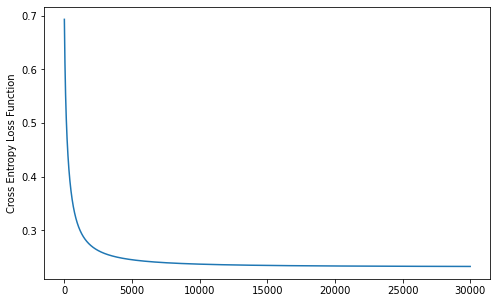

In [ ]:
c = logistic_regressor(X_normalized,y)
c.fit()
c.plot_error()

In [ ]:
H = X_normalized.copy()
H_lab = y.copy()
print("The accuracy over the training data is: ", c.accu_eval(H,H_lab)*100,"%")

The accuracy over the training data is:  88.73239436619718 %


The Time taken to fit the model is 1.4229350090026855 seconds


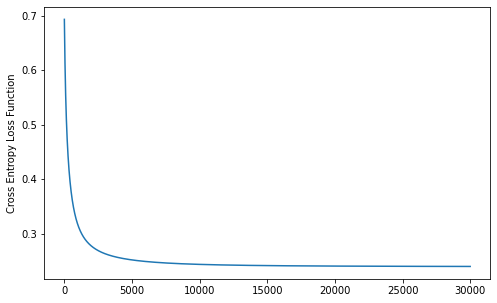

In [ ]:
#drop some correlated features and try again
df_reduced = df_data.drop(['malaise','fatigue','liver_big'],axis=1)
X_red = df_reduced.iloc[:, 0:-1].to_numpy()
y_red = df_reduced.iloc[:,-1:].to_numpy() 
X_red = preprocessing.scale(X_red)
H_red = X_red.copy()
H_lab_red = y_red.copy()

c = logistic_regressor(X_red,y_red)
c.fit()
c.plot_error()

In [ ]:
#H = X_normalized.copy()
#H_lab = y.copy()
print("The accuracy over the training data is: ", c.accu_eval(H_red,H_lab_red)*100,"%")

The accuracy over the training data is:  88.02816901408451 %


# **Section 4: K fold Cross Validation Function**

In [ ]:
#extend feature space
def extend_feature_space(X,n):
  X_extend = X
  no_of_columns = X.shape[1]
  for i in range(2,n+1):
    for j in range(no_of_columns):
      #take nth power of column then concatenate
      nth_pow = np.power(X[:,j:j+1],i)
      X_extend = np.concatenate((X_extend,nth_pow), axis=1)
  print(X_extend.shape)
  return X_extend

#shuffle data before partitioning into k-1 places
def shuffle_data():
  return df_data.sample(frac = 1) 

#function to concatenate 2d arrays obtained from partioning stage
def concatenate_n_2darrays(h):
  #h is a list of 2d arrays to be concatenated
  g = h[0]
  for i in range(len(h)-1):
    g = np.concatenate((g,h[i+1]))
  return g

#k fold cross validation.    
def k_cross_val(k,l_r,n_s,model=1):
  #shuffle data
  df_rand_data = shuffle_data()
  X_rand = df_rand_data.iloc[:, 0:-1].to_numpy()
  y_rand = df_rand_data.iloc[:,-1:].to_numpy()
  X_rand = preprocessing.scale(X_rand)
  X_rand = extend_feature_space(X_rand,model)
  #randomly partion data into k groups
  div = X_rand.shape[0]//k
  rem = X_rand.shape[0]%k 
  if (rem==0):
    X_rand_trunc =  X_rand
    y_rand_trunc = y_rand
  else:
    X_rand_trunc =  X_rand[:-rem,]
    y_rand_trunc = y_rand[:-rem,]
  #list that holds each of the k subdivisions of input data
  fold_data = np.split(X_rand_trunc, k)
  fold_labels = np.split(y_rand_trunc, k)
  #create a list of k-1 2darrays of features i.e. train data
  matrix_list_data = []
  matrix_list_labels = []
  #create a list of hold out data as test data to obtain error performance
  hold_out_data = []
  hold_out_labels = []
  for i in range(len(fold_data)):
    temp_data = fold_data[0:i]+fold_data[i+1:]
    temp_labels = fold_labels[0:i]+fold_labels[i+1:]
    matrix_list_data.append(concatenate_n_2darrays(temp_data))
    matrix_list_labels.append(concatenate_n_2darrays(temp_labels))
    hold_out_data.append(fold_data[i])
    hold_out_labels.append(fold_labels[i])
  
  
  #Create logistic regression class for each of the data matrix and data labels
  #create a list of objects and initialize them using matrix list data and labels
  list_of_objects = []
  for i in range(len(matrix_list_data)):
    list_of_objects.append(logistic_regressor(matrix_list_data[i], matrix_list_labels[i],l_r,n_s))
  
  for i in range(len(list_of_objects)):
    list_of_objects[i].fit()
  #create list of errors
  list_of_errors = []
  for i in range(len(list_of_objects)):
    list_of_errors.append(list_of_objects[i].accu_eval(hold_out_data[i],hold_out_labels[i]))
  #return model with best accuracy and average all of the errors from each of the K validation stage
  return list_of_objects[list_of_errors.index(max(list_of_errors))],np.array(list_of_errors).mean()
  #print(list_of_errors)  
  

Test Cross Validation and obtain True Model Error

In [ ]:
l=k_cross_val(10,0.00005,300000,1)
print("After 10-fold cross validation the best weights evaluated on the training data is: ", l[0].accu_eval(H,H_lab)*100,"%")
print("The average accuracy over the ten validation stages is: ", l[1]*100,"%")

(142, 19)
The Time taken to fit the model is 13.49884033203125 seconds
The Time taken to fit the model is 13.485549211502075 seconds
The Time taken to fit the model is 13.567039966583252 seconds
The Time taken to fit the model is 13.48703932762146 seconds
The Time taken to fit the model is 13.332381963729858 seconds
The Time taken to fit the model is 13.509225845336914 seconds
The Time taken to fit the model is 13.45130968093872 seconds
The Time taken to fit the model is 13.178637027740479 seconds
The Time taken to fit the model is 13.441639184951782 seconds
The Time taken to fit the model is 13.47796893119812 seconds
After 10-fold cross validation the best weights evaluated on the training data is:  88.73239436619718 %
The average accuracy over the ten validation stages is:  79.28571428571428 %


# **Section 5: Create Higher Order Polynomial Models**

In [ ]:
#build polynomial model of order n
#return logistic regressor object
#X,y => inp/oup and n is the model order
#the function returns a logistic regressor object with new model parameters
def build_model(X,y,n,step_size,no_of_steps):
  extended_X = extend_feature_space(X,n)
  new_model = logistic_regressor(extended_X,y,step_size,no_of_steps)
  return new_model
  

Test for model of order 2

In [ ]:
d = build_model(H,H_lab,2,0.00005,30000)
d.fit()
print("The accuracy on the training set is: ",d.accu_eval(extend_feature_space(H,2),H_lab)*100,"%")

(142, 38)
The Time taken to fit the model is 1.5254859924316406 seconds
(142, 38)
The accuracy on the training set is:  91.54929577464789 %


In [ ]:
l=k_cross_val(10,0.00005,300000,2)
print("After 10-fold cross validation the best weights evaluated on the training data is: ", l[0].accu_eval(extend_feature_space(H,2),H_lab)*100,"%")
print("The average accuracy over the ten validation stages is: ", l[1]*100,"%")

(142, 38)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


The Time taken to fit the model is 15.398088932037354 seconds
The Time taken to fit the model is 13.876569986343384 seconds
The Time taken to fit the model is 13.832897186279297 seconds
The Time taken to fit the model is 16.323028087615967 seconds
The Time taken to fit the model is 13.63768219947815 seconds
The Time taken to fit the model is 15.319059371948242 seconds
The Time taken to fit the model is 14.748257875442505 seconds
The Time taken to fit the model is 13.752409934997559 seconds
The Time taken to fit the model is 15.493191242218018 seconds
The Time taken to fit the model is 14.833984375 seconds
(142, 38)
After 10-fold cross validation the best weights evaluated on the training data is:  92.25352112676056 %
The average accuracy over the ten validation stages is:  79.28571428571428 %


Test for model of order 3

In [ ]:
d = build_model(H,H_lab,3,0.00005,300000)
d.fit()
print("The accuracy on the training set is: ",d.accu_eval(extend_feature_space(H,3),H_lab)*100,"%")

(142, 57)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


The Time taken to fit the model is 16.984212398529053 seconds
(142, 57)
The accuracy on the training set is:  94.36619718309859 %


In [ ]:
l=k_cross_val(10,0.00005,300000,3)
print("After 10-fold cross validation the best weights evaluated on the training data is: ", l[0].accu_eval(extend_feature_space(H,3),H_lab)*100,"%")
print("The average accuracy over the ten validation stages is: ", l[1]*100,"%")

(142, 57)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


The Time taken to fit the model is 16.014695644378662 seconds
The Time taken to fit the model is 15.9006187915802 seconds
The Time taken to fit the model is 16.475997924804688 seconds
The Time taken to fit the model is 16.265989542007446 seconds
The Time taken to fit the model is 15.90017032623291 seconds
The Time taken to fit the model is 16.32473397254944 seconds
The Time taken to fit the model is 16.67980670928955 seconds
The Time taken to fit the model is 16.6118483543396 seconds
The Time taken to fit the model is 16.205755710601807 seconds
The Time taken to fit the model is 16.270187616348267 seconds
(142, 57)
After 10-fold cross validation the best weights evaluated on the training data is:  94.36619718309859 %
The average accuracy over the ten validation stages is:  80.71428571428572 %


Test for model of order 4

In [ ]:
d = build_model(H,H_lab,4,0.00005,300000)
d.fit()
print("The accuracy on the training set is: ",d.accu_eval(extend_feature_space(H,4),H_lab)*100,"%")

(142, 76)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


The Time taken to fit the model is 31.737716913223267 seconds
(142, 76)
The accuracy on the training set is:  100.0 %


In [ ]:
l=k_cross_val(10,0.00005,300000,4)
print("After 10-fold cross validation the best weights evaluated on the training data is: ", l[0].accu_eval(extend_feature_space(H,4),H_lab)*100,"%")
print("The average accuracy over the ten validation stages is: ", l[1]*100,"%")

(142, 76)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


The Time taken to fit the model is 30.023741245269775 seconds
The Time taken to fit the model is 29.355493545532227 seconds
The Time taken to fit the model is 28.387471675872803 seconds
The Time taken to fit the model is 30.85310173034668 seconds
The Time taken to fit the model is 28.580388069152832 seconds
The Time taken to fit the model is 29.171967267990112 seconds
The Time taken to fit the model is 29.649349689483643 seconds
The Time taken to fit the model is 28.290646076202393 seconds
The Time taken to fit the model is 29.316201210021973 seconds
The Time taken to fit the model is 28.67144536972046 seconds
(142, 76)
After 10-fold cross validation the best weights evaluated on the training data is:  100.0 %
The average accuracy over the ten validation stages is:  80.71428571428572 %


# **Bankrupcy Data Section**

In [ ]:
#change file location to correct file path on grader's computer
df_data = pd.read_csv('/content/gdrive/My Drive/ECSE 551: Mini Project 1/bankrupcy.csv')

In [ ]:
df_data.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,attribute10,attribute11,attribute12,attribute13,attribute14,attribute15,attribute16,attribute17,attribute18,attribute19,attribute20,attribute21,attribute22,attribute23,attribute24,attribute25,attribute26,attribute27,attribute28,attribute29,attribute30,attribute31,attribute32,attribute33,attribute34,attribute35,attribute36,attribute37,attribute38,attribute39,attribute40,attribute41,attribute42,attribute43,attribute44,attribute45,attribute46,attribute47,attribute48,attribute49,attribute50,attribute51,attribute52,attribute53,attribute54,attribute55,attribute56,attribute57,attribute58,attribute59,attribute60,attribute61,attribute62,attribute63,attribute64,ClassLabel
0,-0.0315,-0.0913,-0.0403,-0.0135,0.00741,-0.0160,-0.000264,0.6410,-0.748,0.1270,-0.214,-0.0366,-0.01090,-0.000269,-0.00530,-0.243,0.5800,-0.00240,0.02930,-0.07030,-0.0164,-0.4030,0.03310,-0.00452,0.0502,-0.207,-0.00999,-0.0194,-0.6310,-0.0155,0.06620,-0.01400,-0.3690,-0.144,-0.436,-0.974000,-0.0341,0.07980,-0.0162,0.1810,-0.00721,-0.0139,-0.0193,-0.00908,0.01720,0.1470,-0.0419,-0.1480,0.00486,-0.192,-1.0300,-0.01330,-0.01640,-0.0181,-0.1110,0.01440,0.00546,-0.01410,-0.02090,0.0684,-0.2140,-0.01390,-0.1740,-0.0468,0
1,-0.2320,-0.0494,0.3040,-0.0810,0.00751,-0.0160,-0.035000,0.0747,0.470,0.0738,-0.836,-0.3000,-0.01310,-0.035000,-0.12000,-0.603,0.0407,-0.03660,-0.02590,-0.04790,-0.0170,-0.8730,-0.02220,0.04890,0.2740,-0.591,-0.01090,-0.0158,-1.1700,-0.0222,-0.03150,-0.02320,0.0220,1.230,-0.986,0.190000,-0.0245,0.01110,-0.0526,-0.0881,-0.00788,-0.0396,-0.0164,-0.00966,0.00237,-0.0135,-0.0350,-0.7900,-0.02520,0.187,-0.0791,-0.02250,-0.00301,-0.0145,-0.1150,0.00849,-0.00839,-0.00867,-0.02310,-0.0335,-0.2060,-0.01520,-0.0731,-0.0272,0
2,-0.0586,0.0651,-0.4880,-0.1890,0.00657,-0.0160,-0.004950,-0.4560,0.270,-0.0713,0.157,-0.1510,-0.01170,-0.004960,0.00948,-0.367,-0.4650,-0.00702,0.00439,0.00176,-0.0175,0.1520,0.00817,0.03060,-0.1140,-0.339,-0.00993,-0.0209,0.0962,-0.0152,0.00913,-0.01600,-0.3200,0.060,0.766,-0.000812,-0.0345,-0.02380,0.0685,-0.1480,-0.00740,0.0203,-0.0154,-0.01650,0.00391,-0.2350,-0.0129,0.0846,0.03030,-0.469,0.3940,-0.01530,-0.03020,-0.0196,-0.1230,0.01080,0.00678,-0.00944,-0.00792,-0.0435,0.0197,-0.01170,-0.2920,-0.0336,0
3,-0.0694,0.0446,-0.1820,-0.1400,0.00748,-0.0109,-0.005600,-0.4630,-0.287,-0.0853,-0.315,-0.1460,-0.01100,-0.005600,0.04590,-0.454,-0.4140,-0.00765,0.01570,-0.00643,-0.0161,-0.0895,0.01460,-0.03820,-0.1060,-0.443,-0.00992,-0.0196,0.2960,0.0147,0.01130,0.00659,-0.5770,-0.643,-0.100,-1.070000,-0.0345,-0.00411,0.0710,-0.1390,-0.00734,0.0558,0.0187,0.02080,0.00406,-0.0679,-0.0166,0.0795,0.05850,-0.515,-0.2680,0.00728,-0.03390,-0.0200,-0.0771,0.01070,0.00538,-0.01080,0.00138,-0.0428,-0.3510,0.00297,-0.5550,-0.0468,0
4,0.2360,-0.0519,0.6780,-0.0147,0.00788,-0.0160,0.057400,0.0972,0.423,0.0769,0.919,0.2090,-0.00891,0.057400,-0.02100,0.744,0.0621,0.05440,0.06730,-0.04310,-0.0160,0.8670,0.05980,0.10800,-0.1280,0.675,-0.00906,-0.0121,-0.5010,-0.0246,0.06960,-0.02190,-0.0692,0.892,1.000,0.145000,-0.0304,0.01970,0.0763,0.0179,-0.00744,0.0573,-0.0170,-0.01100,0.00655,0.0499,-0.0312,0.6150,0.06310,0.343,-0.2100,-0.02130,0.00523,-0.0107,-0.0766,0.01100,0.02530,-0.01110,-0.02250,-0.0359,-0.1820,-0.01560,-0.0278,-0.0237,0


In [ ]:
df_data.shape

(453, 65)

In [ ]:
#check for missing data entries to ensure there are no erros
if (df_data.isna().any().any()==False):
  print("There are no missing data entries")
else:
  print("Stop: Missing Data")

There are no missing data entries


# **Data Exploration And Preprocessing**

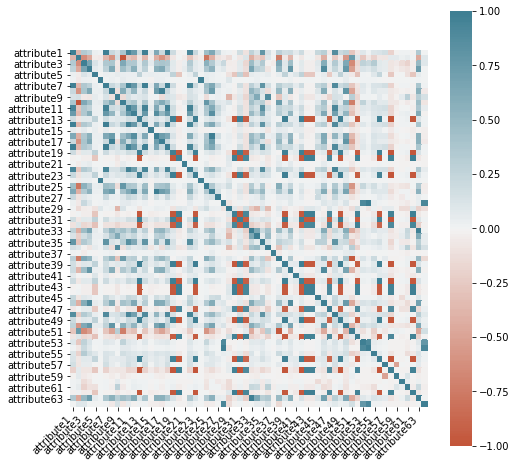

In [ ]:
corr = df_data.iloc[:,0:-1].corr()
plt.subplots(figsize=(8,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
X,y = split_data()  #features,#labels
X_normalized = preprocessing.scale(X) #z-normalize input

The shape of the feature matrix is:  (453, 64)
The shape of the label vector is:  (453, 1)


# **Build Models: Linear and Higher Order with K cross Validation**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


The Time taken to fit the model is 4.57414984703064 seconds


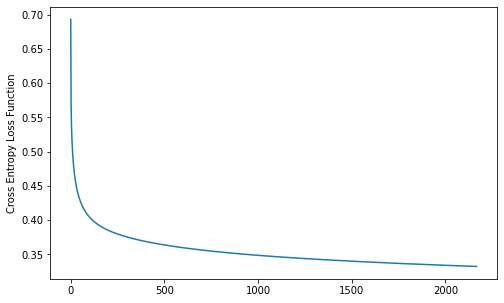

In [ ]:
c = logistic_regressor(X_normalized,y,0.002)
c.fit()
c.plot_error()

In [ ]:
H = X_normalized.copy()
H_lab = y.copy()
print("The accuracy over the training data is: ", c.accu_eval(H,H_lab)*100,"%")

The accuracy over the training data is:  87.19646799116998 %


In [ ]:
l=k_cross_val(10,0.00008,300000,1)
print("After 10-fold cross validation the best weights evaluated on the training data is: ", l[0].accu_eval(H,H_lab)*100,"%")
print("The average accuracy over the ten validation stages is: ", l[1]*100,"%")

(453, 64)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


The Time taken to fit the model is 41.461172580718994 seconds
The Time taken to fit the model is 38.93745446205139 seconds
The Time taken to fit the model is 42.52060079574585 seconds
The Time taken to fit the model is 40.62196683883667 seconds
The Time taken to fit the model is 41.40176057815552 seconds
The Time taken to fit the model is 41.547003984451294 seconds
The Time taken to fit the model is 41.921900510787964 seconds
The Time taken to fit the model is 40.93968653678894 seconds
The Time taken to fit the model is 39.82141923904419 seconds
The Time taken to fit the model is 41.568265199661255 seconds
After 10-fold cross validation the best weights evaluated on the training data is:  86.75496688741721 %
The average accuracy over the ten validation stages is:  79.33333333333333 %


In [ ]:
d = build_model(H,H_lab,2,0.00005,800000)
d.fit()
print("The accuracy on the training set is: ",d.accu_eval(extend_feature_space(H,2),H_lab)*100,"%")

(453, 128)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


The Time taken to fit the model is 143.47854232788086 seconds
(453, 128)
The accuracy on the training set is:  92.93598233995584 %


In [ ]:
l=k_cross_val(10,0.00008,300000,2)
print("After 10-fold cross validation the best weights evaluated on the training data is: ", l[0].accu_eval(extend_feature_space(H,2),H_lab)*100,"%")
print("The average accuracy over the ten validation stages is: ", l[1]*100,"%")

(453, 128)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


The Time taken to fit the model is 48.24548530578613 seconds
The Time taken to fit the model is 48.55731558799744 seconds
The Time taken to fit the model is 46.614304304122925 seconds
The Time taken to fit the model is 47.853548765182495 seconds
The Time taken to fit the model is 48.39560389518738 seconds
The Time taken to fit the model is 47.91131067276001 seconds
The Time taken to fit the model is 48.9169225692749 seconds
The Time taken to fit the model is 48.41049838066101 seconds
The Time taken to fit the model is 48.731266021728516 seconds
The Time taken to fit the model is 48.29362630844116 seconds
(453, 128)
After 10-fold cross validation the best weights evaluated on the training data is:  92.93598233995584 %
The average accuracy over the ten validation stages is:  79.33333333333333 %


In [ ]:
d = build_model(H,H_lab,3,0.00005,300000)
d.fit()
print("The accuracy on the training set is: ",d.accu_eval(extend_feature_space(H,3),H_lab)*100,"%")

(453, 192)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


The Time taken to fit the model is 61.85358023643494 seconds
(453, 192)
The accuracy on the training set is:  95.58498896247241 %


In [ ]:
l=k_cross_val(10,0.00008,300000,3)
print("After 10-fold cross validation the best weights evaluated on the training data is: ", l[0].accu_eval(extend_feature_space(H,3),H_lab)*100,"%")
print("The average accuracy over the ten validation stages is: ", l[1]*100,"%")

(453, 192)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


The Time taken to fit the model is 54.59701108932495 seconds
The Time taken to fit the model is 55.933114767074585 seconds
The Time taken to fit the model is 55.00482106208801 seconds
The Time taken to fit the model is 54.586061000823975 seconds
The Time taken to fit the model is 55.59623670578003 seconds
The Time taken to fit the model is 55.35948395729065 seconds
The Time taken to fit the model is 54.973949909210205 seconds
The Time taken to fit the model is 54.59085988998413 seconds
The Time taken to fit the model is 55.29171323776245 seconds
The Time taken to fit the model is 57.41022539138794 seconds
(453, 192)
After 10-fold cross validation the best weights evaluated on the training data is:  96.02649006622516 %
The average accuracy over the ten validation stages is:  78.66666666666666 %
